In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from zipfile import ZipFile
from skimage import io
from skimage.util import img_as_ubyte
from skimage.filters.rank import otsu
from skimage.morphology import disk
from skimage.filters import threshold_otsu
from skimage.feature import local_binary_pattern

In [2]:
TARGET_NAMES = {'nao_faixa': 0,
                'faixa_frente': 1,
                'faixa_diagonal_direita': 2,
                'faixa_diagonal_esquerda': 3}

path_dict = {name: [] for name in TARGET_NAMES}

with ZipFile('./texturas.zip') as zip_file:
  for path in zip_file.namelist():
    # a pasta de cada amostra é o segundo elemento do split
    folder = path.split('/')[1]
    # Separando amostras por classe
    if folder in TARGET_NAMES:
      path_dict[folder].append(f'./texturas.zip/{path}')

# Mostrando quantidade de amostras por classe
for target in path_dict:
  print(f'{target}: {len(path_dict[target])} amostras')

# exemplo de path de uma amostra
example_path = path_dict['faixa_frente'][0]
example_path


nao_faixa: 750 amostras
faixa_frente: 250 amostras
faixa_diagonal_direita: 250 amostras
faixa_diagonal_esquerda: 250 amostras


'./texturas.zip/Classes/faixa_frente/96.jpg'

gray image shape: (720, 1280)


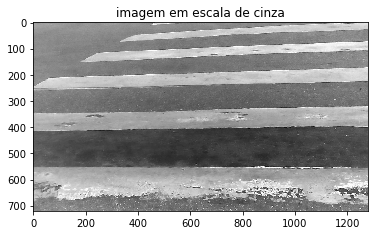

global otsu image shape: (720, 1280)


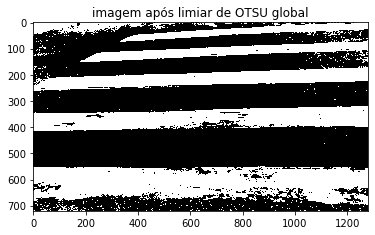

local otsu image shape: (720, 1280)


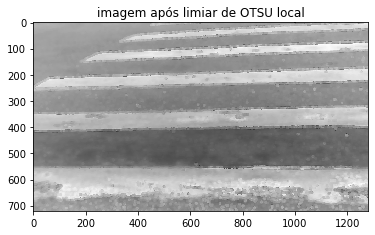

In [7]:
# Imagem em escala de cinza
img_gray = io.imread(example_path, as_gray=True)
plt.imshow(img_gray)
plt.title('imagem em escala de cinza')
plt.gray()
print(f'gray image shape: {img_gray.shape}')
plt.show()

# Imagem após Limiar de OTSU global
img_global_otsu = img_gray >= threshold_otsu(img_gray)
plt.imshow(img_global_otsu)
plt.title('imagem após limiar de OTSU global')
print(f'global otsu image shape: {img_global_otsu.shape}')
plt.show()

# Imagem após Limiar de OTSU local
RADIUS = 5
selem = disk(RADIUS)
img_local_otsu = otsu(img_as_ubyte(img_gray), selem)
plt.imshow(img_local_otsu)
plt.title('imagem após limiar de OTSU local')
print(f'local otsu image shape: {img_local_otsu.shape}')
plt.show()

In [9]:
# Parâmetros do LBP
METHOD = 'nri_uniform'
RADIUS = 1
N_POINTS = 8

amostra = []
for target_name in TARGET_NAMES:
    for path in path_dict[target_name]:
        img = io.imread(path, as_gray=True)

        img_otsu = img >= threshold_otsu(img)
        
        lbp = local_binary_pattern(image=img_otsu, P=N_POINTS, R=RADIUS, method=METHOD).flatten()
        hist = pd.Series(lbp).value_counts().sort_index()
        arr = np.zeros(59)
        for i in hist.index:
            arr[int(i)] = hist[i]

        df = pd.DataFrame(data=[arr])
        df['target'] = TARGET_NAMES[target_name]
        amostra.append(df)

data = pd.concat(amostra, ignore_index=True)
data.to_csv('./csvs/otsu-lbp_faixas.csv')
data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,target
0,846.0,1602.0,0.0,795.0,0.0,1616.0,0.0,858.0,0.0,0.0,...,0.0,5261.0,0.0,3805.0,0.0,5118.0,0.0,834884.0,7897.0,0
1,25.0,89.0,0.0,45.0,0.0,86.0,0.0,56.0,0.0,0.0,...,0.0,729.0,0.0,975.0,0.0,749.0,0.0,902165.0,881.0,0
2,314.0,642.0,0.0,338.0,0.0,573.0,0.0,362.0,0.0,0.0,...,0.0,3353.0,0.0,2583.0,0.0,3035.0,0.0,869313.0,5095.0,0
3,218.0,386.0,0.0,200.0,0.0,401.0,0.0,234.0,0.0,0.0,...,0.0,1974.0,0.0,1868.0,0.0,1764.0,0.0,886748.0,3003.0,0
4,25.0,57.0,0.0,54.0,0.0,65.0,0.0,40.0,0.0,0.0,...,0.0,440.0,0.0,525.0,0.0,555.0,0.0,908496.0,471.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,90.0,277.0,0.0,67.0,0.0,269.0,0.0,96.0,0.0,0.0,...,0.0,1331.0,0.0,1322.0,0.0,1311.0,0.0,893755.0,1614.0,3
1496,173.0,415.0,0.0,160.0,0.0,467.0,0.0,162.0,0.0,0.0,...,0.0,1623.0,0.0,2161.0,0.0,1484.0,0.0,878452.0,2600.0,3
1497,108.0,313.0,0.0,161.0,0.0,317.0,0.0,169.0,0.0,0.0,...,0.0,1337.0,0.0,1994.0,0.0,1170.0,0.0,884913.0,2365.0,3
1498,369.0,1149.0,0.0,349.0,0.0,1173.0,0.0,331.0,0.0,0.0,...,0.0,1842.0,0.0,2004.0,0.0,1779.0,0.0,879008.0,4204.0,3
